# Two-stream instability

A two-stream instability occurs when two species (either the same or different) in a plasma have different drift velocities. Depending on the physical parameters, modes can then arise which are unstable and grow exponentially. To begin, we derive the general dispersion relation for these instabilities.

## General dispersion relation

Consider two cold species, which we will generically label species 1 and species 2, each with constant drift velocity $\vec{v}_{0,1}$ and $\vec{v}_{0,2}$ and fluctuating velocity $\tilde{\vec{v}}_1$ and $\tilde{\vec{v}}_2$, respectively. The linearized Navier-Stokes equation for each species is then

$$ \frac{d}{d t} \tilde{\vec{v}}_s = \frac{\partial}{\partial t} \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}}. $$

In addition, the continuity equation for each species is

$$ \frac{\partial}{\partial t} \tilde{n}_s + n_{0,s} \nabla \cdot \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{n}_s = 0. $$

Poisson's equation then yields

$$ \nabla \cdot \tilde{\vec{E}} = 4\pi \sum_{s}q_s \tilde{n}_s. $$

If we assume a plane wave solution of the form $\tilde{\vec{E}} = \vec{E}_0 e^{i(\vec{k} \cdot \vec{r} - \omega t)}$, then the dynamical equation turns into

$$ (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})\tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}} \\
\Rightarrow \tilde{\vec{v}}_s = \frac{q_s \tilde{\vec{E}}}{i m_s (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})}. $$

Similarly, the continuity equation can be rewritten as

$$ -i\omega \tilde{n}_s + i n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s + i \vec{k} \cdot \vec{v}_{0,s} \tilde{n}_s = 0 \\
\Rightarrow \tilde{n}_s = \frac{n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s}{\omega - \vec{k} \cdot \vec{v}_{0,s}} = \frac{-q_s n_{0,s} \vec{k} \cdot \tilde{\vec{E}}}{i m_s (\omega - \vec{k} \cdot \vec{v}_{0,s})^2}. $$

If we substitute this expression for $\tilde{n}_s$ into Poisson's equation, after rearranging we find that

$$ \left(1 - \sum_s\frac{\omega_{p,s}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,s})^2}\right)i \vec{k} \cdot \tilde{\vec{E}} = 0. $$

Recognizing that $\nabla \cdot \tilde{\vec{D}} = \nabla \cdot (\epsilon \tilde{\vec{E}}) = \epsilon \vec{k} \cdot \tilde{\vec{E}}$, the term in parenthesis is then our dielectric constant. Setting this equal to zero gives the dispersion relation as

$$ 1 - \frac{\omega_{p,1}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,1})^2} - \frac{\omega_{p,2}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,2})^2} = 0. $$

This equation can be used for various types of two-stream instabilities, for which the parameters $\omega_{p,s}$ and $\vec{v}_{0,s}$ can be adjusted. Following are several specific cases of the two-stream instability.

### Two-stream instability

If the two species in question are simply counter-propagating electron beams of speed $\vec{v}_0$ at the same temperature, then defining $x \equiv \omega/\omega_{pe}$ and $\alpha \equiv \vec{k} \cdot \vec{v}_0/\omega_{pe}$ gives a dispersion relation of

$$ 1=\frac{1}{(x - \alpha)^2}+\frac{1}{(x+\alpha)^2}. $$

Solving the dispersion relation yields

$$ x^2 = 1 + \alpha^2 \pm \sqrt{1+4\alpha^2}, \\
\alpha \gg 1 \Rightarrow x \approx \alpha \pm 1. $$

However, we desire imaginary $\omega$ to have a growing mode, so solving for when $x=0$ gives

$$ 0 = 1 + \alpha^2 \pm \sqrt{1+4\alpha^2},\\
\Rightarrow \alpha\leq\sqrt{2}. $$

The fastest-growing mode occurs when $\frac{dx}{d\alpha}=0$, or $\alpha=\sqrt{3}/2$. The dispersion relation is plotted in the following figure.

<img src="two_real.png">

In [1]:
import osiris
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
plt.rc('font',size=20,family="serif")
%matplotlib inline

In [2]:
dirname = 'onestream'
osiris.run_upic_es(rundir=dirname,inputfile='1stream.txt')

combine_h5_2d completed normally
runbeps completed normally


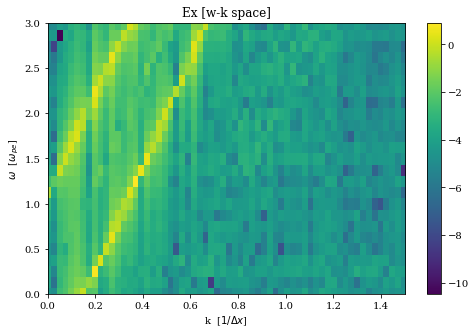

In [5]:

dirname = 'onestream'

osiris.plot_wk_arb(rundir=dirname, field='Ex', wlim=3, klim=1.5)
# osiris.plot_wk(rundir=dirname, wlim=[0,3], klim=[0,25], vth = 0.02, v0 = 0.1, twostr=True, show_theory=True)

Running with only one species at the same drift velocity results in a simple shift of the electron-plasma wave dispersion, $ \omega^2 = \omega_p^2 + 3 v_{the}^2 k^2 $, by $\vec{k}\cdot\vec{v}_0$.

###### Below is the simulation results from the one stream case, it should just be the Doppler shifted Bohm Gross, or in our case (due to the low temperature), a straight line with slope v0



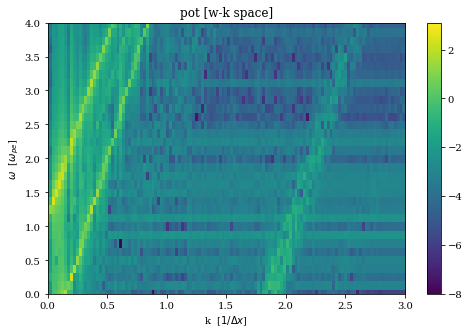

In [7]:
dirname = 'onestream'

osiris.plot_wk_arb(rundir=dirname, field='pot',wlim=4, klim=3)

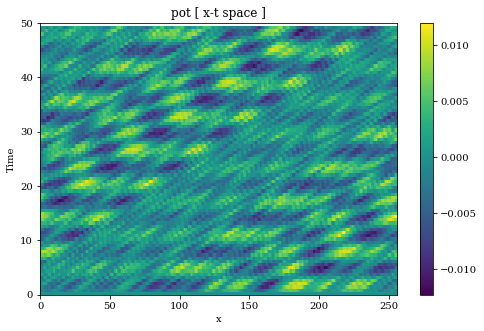

In [3]:
dirname = 'onestream'

osiris.plot_xt_arb(rundir=dirname, field='pot',tlim=[0,50])

In [56]:
dirname='onestream'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=6, description='n', max=12), Output()), _dom_classes=('widget-interact',))

In [12]:
# Two Stream Dispersion Here

omegap=1.0
v0=5.0

def two_stream(w,omegap,k,v0):
    result=omegap*omegap/((w-k*v0)*(w-k*v0))+omegap*omegap/((w+k*v0)*(w+k*v0))
    return result

def ts_disp(w,k):
#    omegap=1.0
#    v0=5.0
    result=two_stream(w,omegap,k,v0)
    return result

karray=np.arange(0,1,0.01)
nk=karray.shape[0]

warrayR=np.zeros(karray.shape[0]);
warrayI=np.zeros(karray.shape[0]); 

warrayR[0]=numpy.sqrt(2)*omegap
warrayI[0]=0.0


    

In [19]:
def disp(w):
    result=ts_disp(w,0.9)
    return result

findroot(disp,0+1.2*j)

mpc(real='3.7141590836785515e-22', imag='4.5')

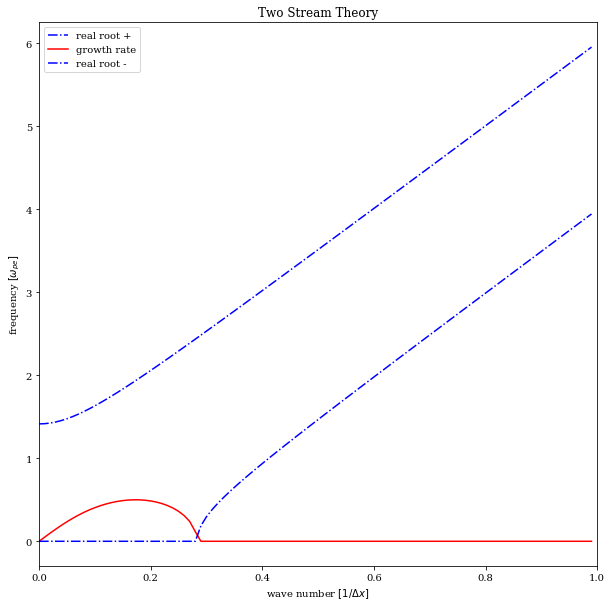

In [4]:
karray=np.arange(0,1,0.01)
nk=karray.shape[0]
omegap=1.0
v0=5.0

omega_plus=np.zeros(karray.shape[0])
omega_minus_r=np.zeros(karray.shape[0])
omega_minus_i=np.zeros(karray.shape[0])

for i in range(0,nk):
    alpha=v0*karray[i]/omegap
    omega_plus[i]=omegap*np.sqrt(1+alpha*alpha+np.sqrt(1+4*alpha*alpha))
    if alpha > np.sqrt(2): 
        omega_minus_r[i]= omegap*np.sqrt(1+alpha*alpha-np.sqrt(1+4*alpha*alpha))
        omega_minus_i[i]=0.0
    else:
        omega_minus_i[i] = omegap*np.sqrt(np.sqrt(1+4*alpha*alpha)-1-alpha*alpha)
        omega_minus_r[i] = 0.0
plt.figure(figsize=(10,10))
plt.plot(karray,omega_plus,'b-.',label = 'real root +')
plt.plot(karray,omega_minus_i,'r',label = 'growth rate')
plt.plot(karray,omega_minus_r,'b-.',label = 'real root - ')
plt.xlabel('wave number $[1/\Delta x]$')
plt.ylabel('frequency $[\omega_{pe}]$')
plt.title('Two Stream Theory')
plt.xlim((0,1))
plt.legend()
plt.show()

In [21]:
dirname = 'twostream'
osiris.run_upic_es(rundir=dirname,inputfile='2stream.txt')

combine_h5_2d completed normally
runbeps completed normally


###### Below is the simulation results from the two stream case.


In [5]:
dirname = 'twostream'



osiris.plot_wk_arb(rundir=dirname, field='pot',,klim=1,wlim=3)






# osiris.plot_wk_arb(rundir=dirname, field='pot',TITLE='potential',klim=3,wlim=1.5)

SyntaxError: invalid syntax (<ipython-input-5-67c9799a5239>, line 5)

/home/jovyan/work/M185-pre-Oct15/two-stream/twostream/Ex.h5


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


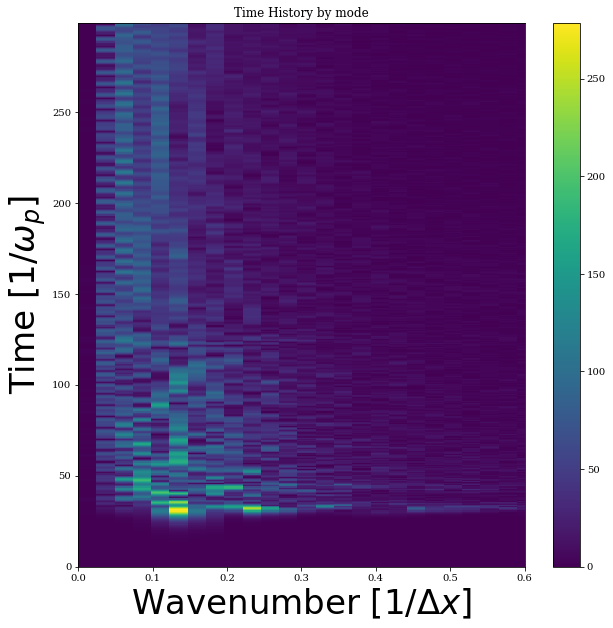

256

In [7]:
# read the history file, plot it vs time and space
from analysis import *
from h5_utilities import *
import os

title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'34'}
workdir = os.getcwd()
dirname ='twostream'
filename=workdir+'/'+dirname+'/Ex.h5'
print(filename)
test4=read_hdf(filename)
# here we fourier analyze the data in space
#
# k_data=np.fft.fft(test.data,axis=1)
k_data=np.fft.fft(test4.data,axis=1)
# k_data_2=np.fft.fft(k_data,axis=0)

test4.data=np.abs(k_data)

test4.axes[0].axis_max=2.0*3.1415926


# test4.data=np.log10(np.real(test4.data)+1e-10)
plt.figure(figsize=(10,10))

plotme(test4)
plt.xlim(0,0.6)
plt.xlabel('Wavenumber [$1/\Delta x$]',**axis_font)
plt.ylabel('Time [$1/\omega_p$]',**axis_font)
plt.title('Time History by mode')
# plt.ylim(0,50)
# plt.ylim(tlim[0],tlim[1])
plt.show()


test4.data.shape[1]

500


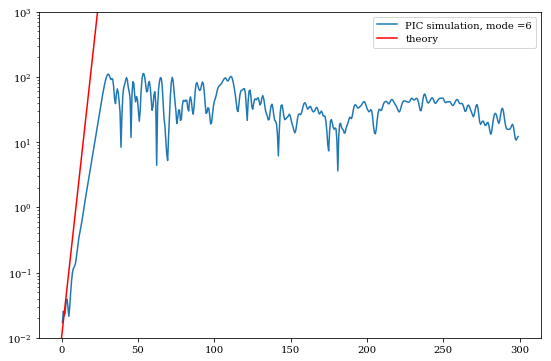

In [9]:
# This cell we try to compare data with theory:

nx=test4.data.shape[1]
nt=test4.data.shape[0]
print(repr(nt))
dk=2*3.1415926/nx
# print('Delta k = '+repr(dk))


# To compare with theory, just specify the mode you want to look at here
#
display_mode = 6
#
#


alpha = v0 * dk * (display_mode)
growth_rate = 0.0
if (alpha<np.sqrt(2)): 
    growth_rate = omegap*np.sqrt(np.sqrt(1+4*alpha*alpha)-1-alpha*alpha)

taxis=np.linspace(0,test4.axes[1].axis_max,nt)
stream_theory=np.zeros(nt)
for it in range(0,nt):
    stream_theory[it]=0.01*np.exp(growth_rate*taxis[it])

plt.figure(figsize=(9,6))
plt.semilogy(taxis,test4.data[:,display_mode],label='PIC simulation, mode ='+repr(display_mode))
plt.semilogy(taxis,stream_theory,'r',label='theory')

plt.ylim((1e-2,1000))
plt.legend()
    
    
plt.show()

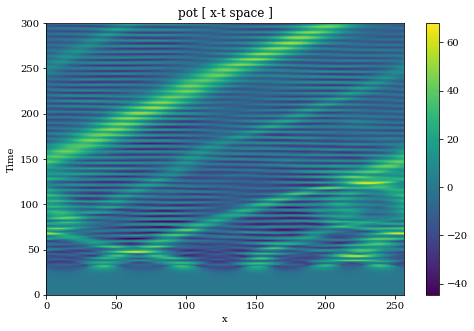

In [10]:
dirname = 'twostream'

#osiris.plot_wk_arb(rundir=dirname, field='pot', TITLE='potential',wlim=4, klim=3)
osiris.plot_xt_arb(rundir=dirname, field='pot' ,tlim=[0,300])

In [70]:
# Here you can see the evolution of phase space

dirname='twostream'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=37, description='n', max=74), Output()), _dom_classes=('widget-interact',))

## Case2 :  $V_0=+/-3 \Delta \omega_p$

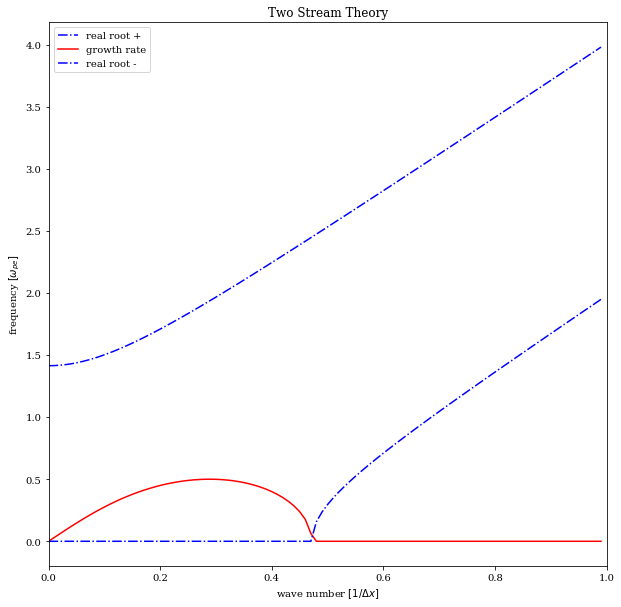

In [5]:
karray=np.arange(0,1,0.01)
nk=karray.shape[0]
omegap=1.0
v0=3.0

omega_plus=np.zeros(karray.shape[0])
omega_minus_r=np.zeros(karray.shape[0])
omega_minus_i=np.zeros(karray.shape[0])

for i in range(0,nk):
    alpha=v0*karray[i]/omegap
    omega_plus[i]=omegap*np.sqrt(1+alpha*alpha+np.sqrt(1+4*alpha*alpha))
    if alpha > np.sqrt(2): 
        omega_minus_r[i]= omegap*np.sqrt(1+alpha*alpha-np.sqrt(1+4*alpha*alpha))
        omega_minus_i[i]=0.0
    else:
        omega_minus_i[i] = omegap*np.sqrt(np.sqrt(1+4*alpha*alpha)-1-alpha*alpha)
        omega_minus_r[i] = 0.0
plt.figure(figsize=(10,10))
plt.plot(karray,omega_plus,'b-.',label = 'real root +')
plt.plot(karray,omega_minus_i,'r',label = 'growth rate')
plt.plot(karray,omega_minus_r,'b-.',label = 'real root - ')
plt.xlabel('wave number $[1/\Delta x]$')
plt.ylabel('frequency $[\omega_{pe}]$')
plt.title('Two Stream Theory')
plt.xlim((0,1))
plt.legend()
plt.show()

In [2]:
dirname = 'twostream-2'
osiris.run_upic_es(rundir=dirname,inputfile='2stream-2.txt')

combine_h5_2d completed normally
runbeps completed normally


/home/jovyan/work/M185-pre-Oct15/two-stream/twostream-2/Ex.h5


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


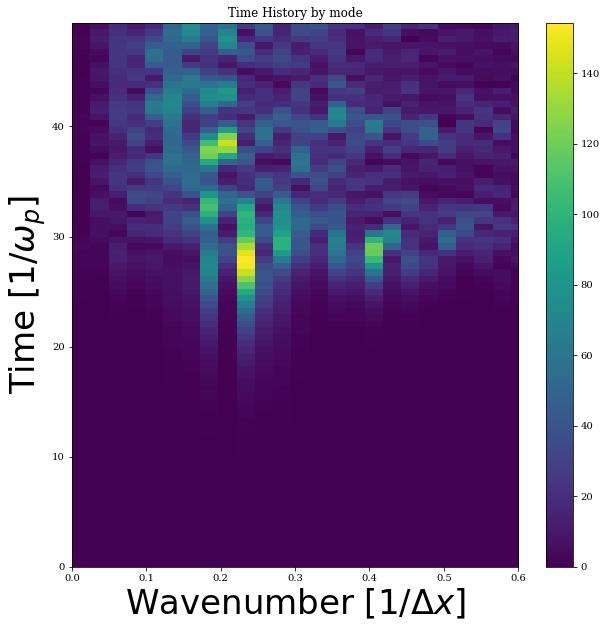

256

In [3]:
# read the history file, plot it vs time and space
from analysis import *
from h5_utilities import *
import os

title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'34'}
workdir = os.getcwd()
dirname ='twostream-2'
filename=workdir+'/'+dirname+'/Ex.h5'
print(filename)
test4=read_hdf(filename)
# here we fourier analyze the data in space
#
# k_data=np.fft.fft(test.data,axis=1)
k_data=np.fft.fft(test4.data,axis=1)
# k_data_2=np.fft.fft(k_data,axis=0)

test4.data=np.abs(k_data)

test4.axes[0].axis_max=2.0*3.1415926


# test4.data=np.log10(np.real(test4.data)+1e-10)
plt.figure(figsize=(10,10))

plotme(test4)
plt.xlim(0,0.6)
plt.xlabel('Wavenumber [$1/\Delta x$]',**axis_font)
plt.ylabel('Time [$1/\omega_p$]',**axis_font)
plt.title('Time History by mode')
# plt.ylim(0,50)
# plt.ylim(tlim[0],tlim[1])
plt.show()


test4.data.shape[1]

84


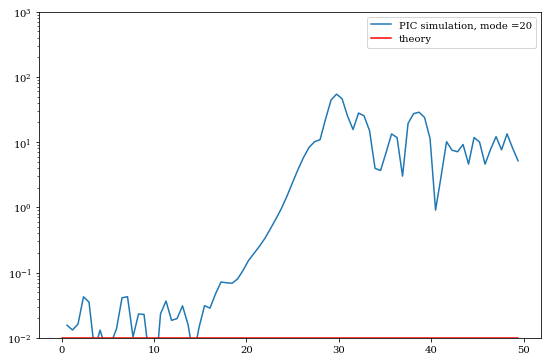

In [12]:
# This cell we try to compare data with theory:

nx=test4.data.shape[1]
nt=test4.data.shape[0]
print(repr(nt))
dk=2*3.1415926/nx
# print('Delta k = '+repr(dk))


# To compare with theory, just specify the mode you want to look at here
#
display_mode = 20
#
#


alpha = v0 * dk * (display_mode)
growth_rate = 0.0
if (alpha<np.sqrt(2)): 
    growth_rate = omegap*np.sqrt(np.sqrt(1+4*alpha*alpha)-1-alpha*alpha)

taxis=np.linspace(0,test4.axes[1].axis_max,nt)
stream_theory=np.zeros(nt)
for it in range(0,nt):
    stream_theory[it]=0.01*np.exp(growth_rate*taxis[it])

plt.figure(figsize=(9,6))
plt.semilogy(taxis,test4.data[:,display_mode],label='PIC simulation, mode ='+repr(display_mode))
plt.semilogy(taxis,stream_theory,'r',label='theory')

plt.ylim((1e-2,1000))
plt.legend()
    
    
plt.show()

In [13]:
# Here you can see the evolution of phase space

dirname='twostream-2'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=6, description='n', max=12), Output()), _dom_classes=('widget-interact',))